----- BASIC INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    15000 non-null  int64  
 1   x1      15000 non-null  float64
 2   x2      15000 non-null  float64
 3   x3      15000 non-null  float64
 4   x4      15000 non-null  float64
 5   x5      15000 non-null  float64
 6   x6      15000 non-null  float64
 7   x7      15000 non-null  float64
 8   x8      15000 non-null  float64
 9   x9      15000 non-null  float64
 10  x10     15000 non-null  float64
 11  x11     15000 non-null  float64
 12  x12     15000 non-null  float64
 13  x13     15000 non-null  float64
 14  x14     15000 non-null  float64
 15  x15     15000 non-null  float64
 16  x16     15000 non-null  float64
 17  x17     15000 non-null  float64
 18  x18     15000 non-null  float64
 19  x19     15000 non-null  float64
 20  x20     15000 non-null  float64
 21  x21     1500

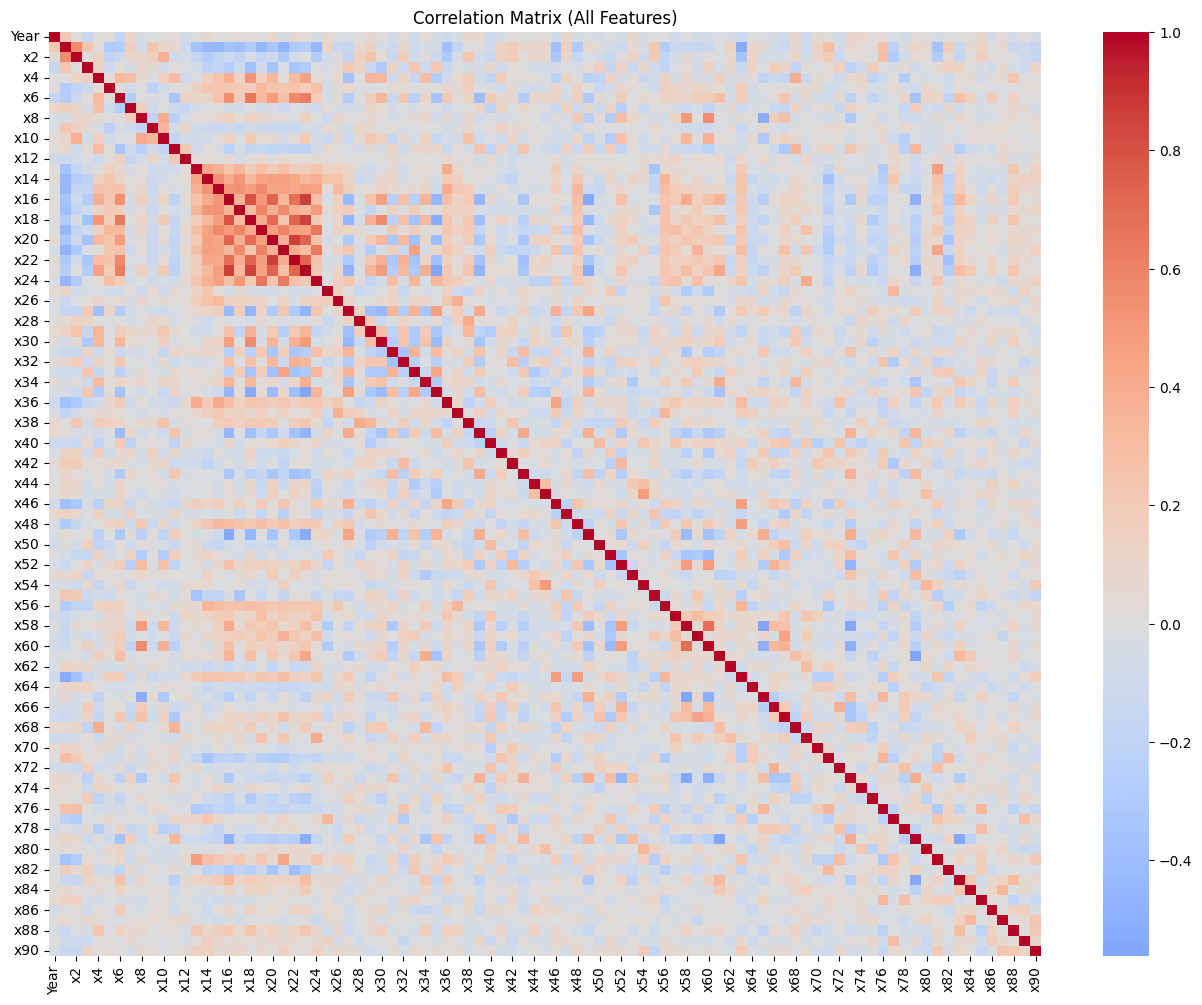

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


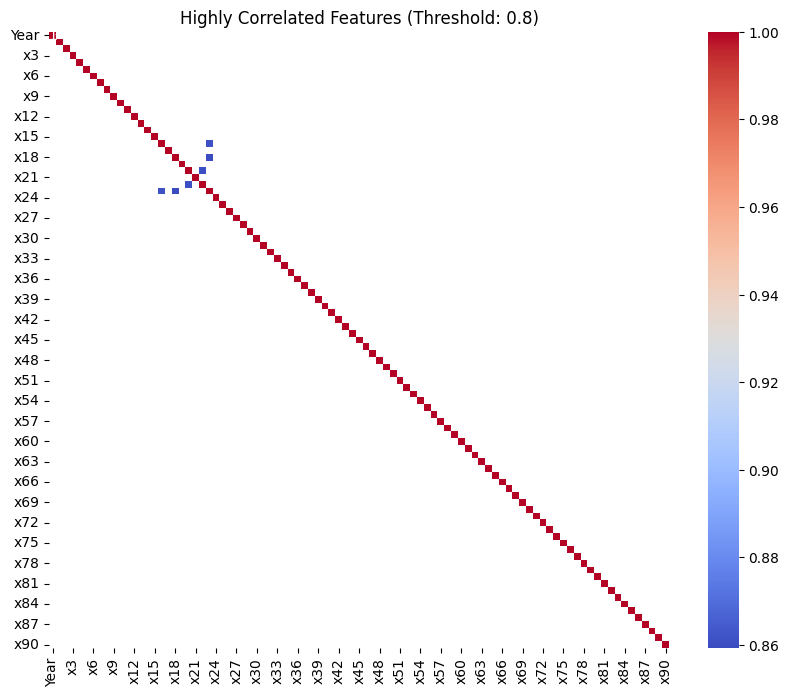

<Figure size 1200x800 with 0 Axes>

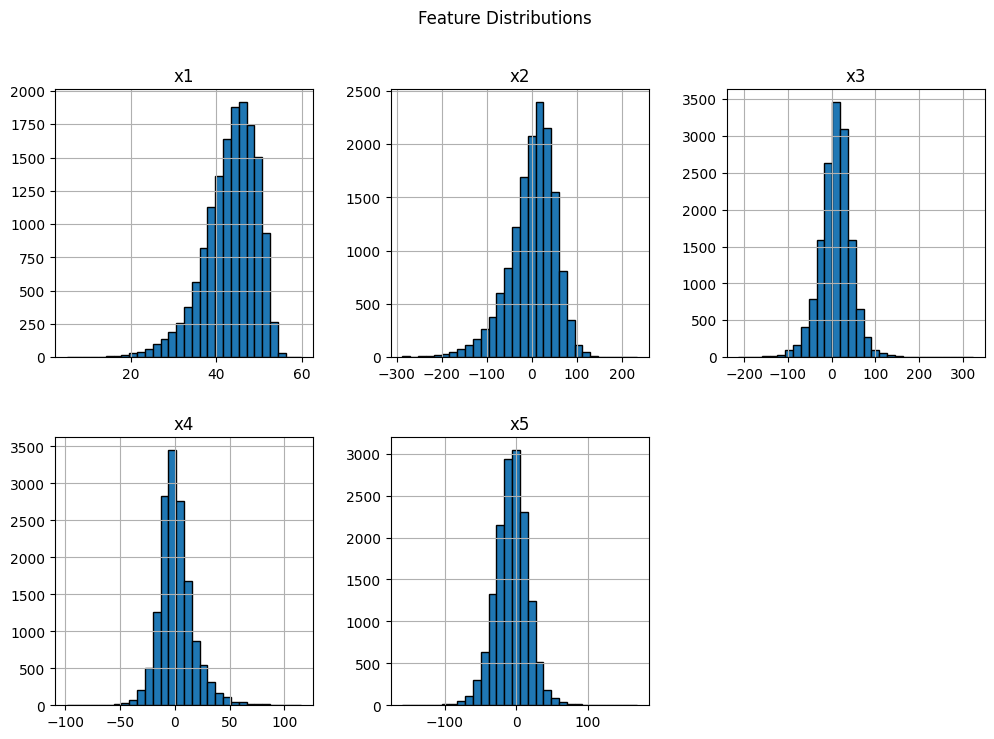

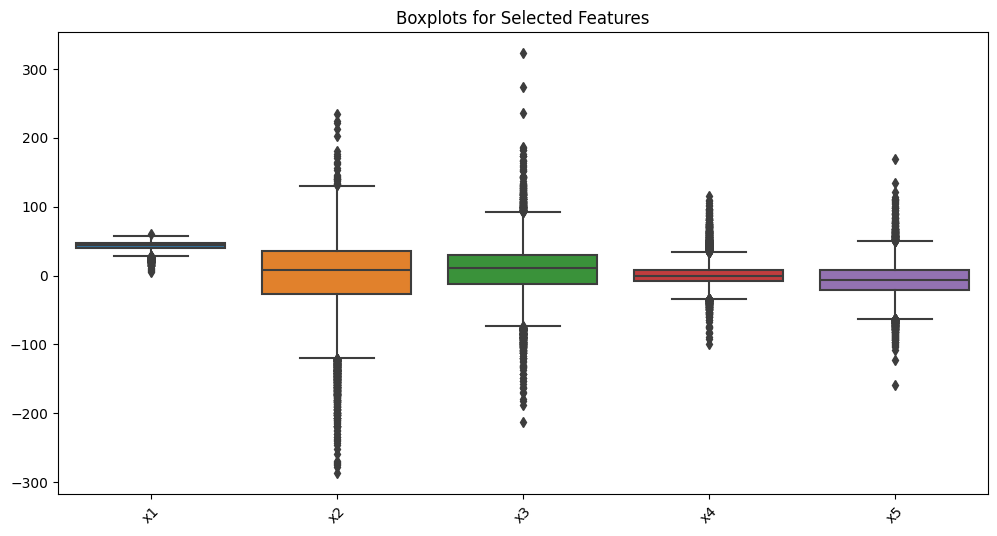

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

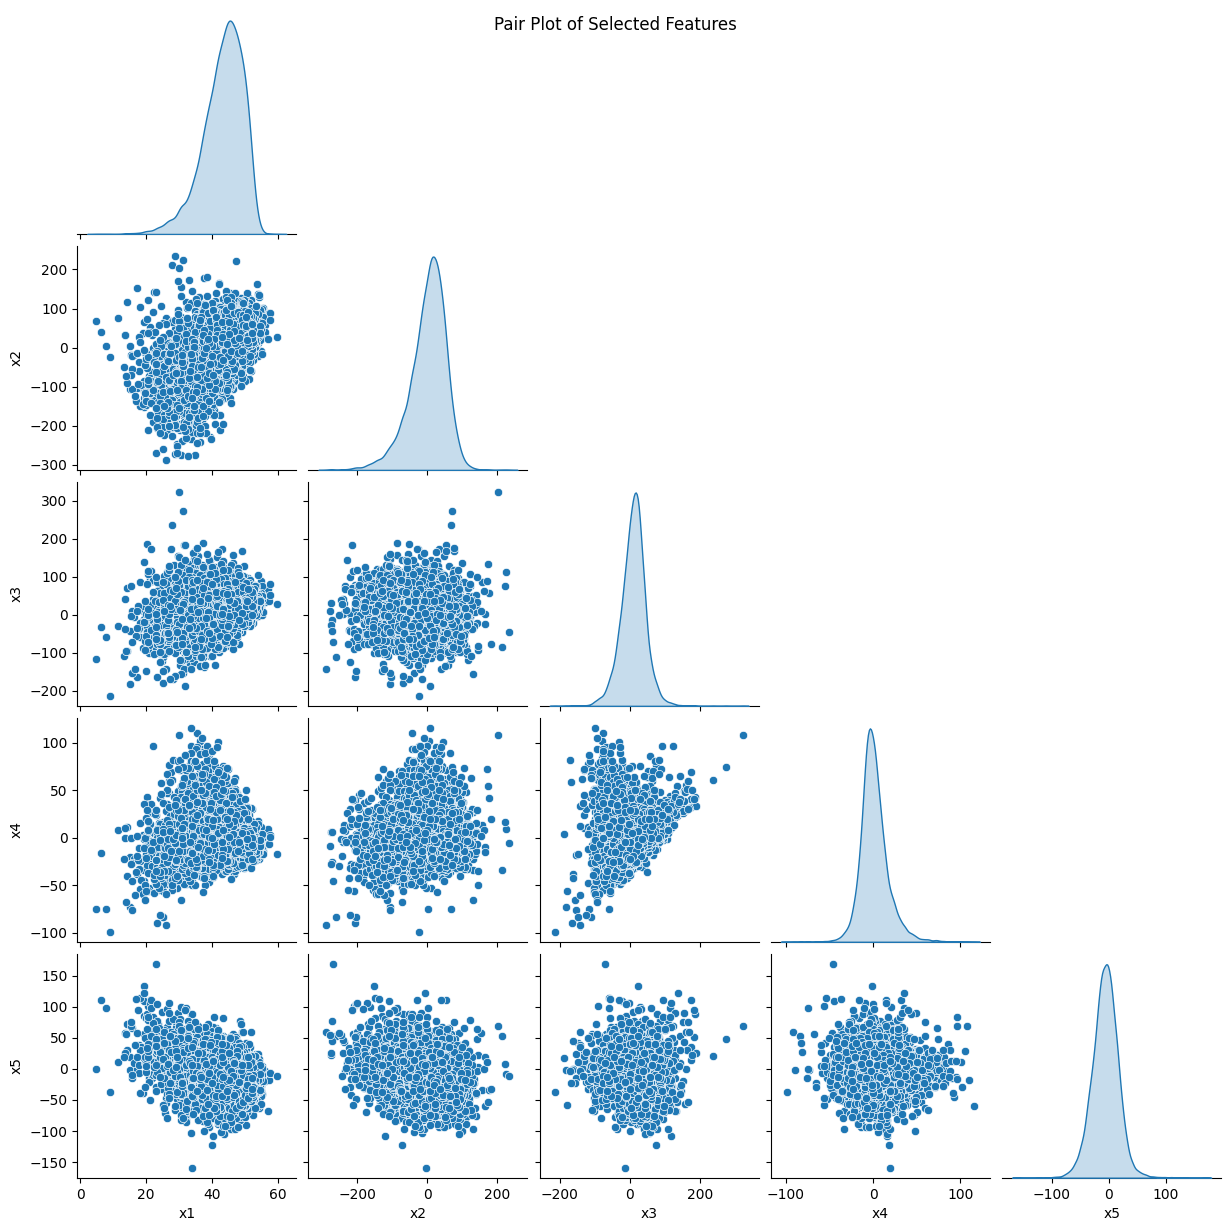

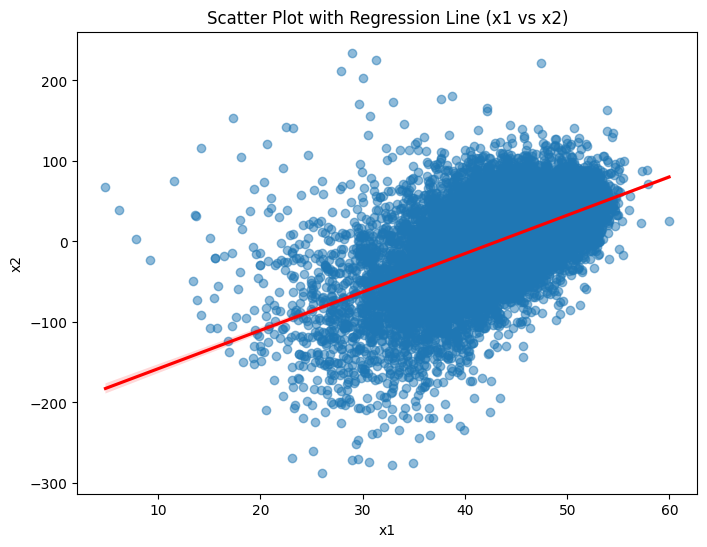


----- OUTLIERS IN 'x1' -----
       Year        x1         x2         x3        x4        x5        x6  \
10     2001  22.95749  -89.49577  -32.41625 -35.35374  17.32078 -37.37759   
87     1940  21.43387  -99.07223   19.74713  -3.52621  61.69141  29.92805   
228    2006  24.62472 -118.15584  -54.65073 -16.55529  -6.32893 -23.04481   
338    2008  15.06193    4.35549  -41.74350 -20.57432  18.44339  -9.87676   
489    2003  23.77100 -153.16943  -65.74533 -17.43316  24.03564  -3.42725   
...     ...       ...        ...        ...       ...       ...       ...   
14656  1993  23.10582  -13.20377    1.88679 -23.30750   5.86244  -8.60110   
14660  2008  24.18329 -219.01712 -125.83796 -81.71569  27.59259 -37.67428   
14755  2002  23.10996 -155.88498  -31.62337 -23.54809  47.50994 -32.10939   
14923  1990  23.16200  -62.22250  -53.26896 -23.78959  37.10451 -22.98964   
14952  1978  23.00005  -41.46195  -64.78360 -35.44753 -35.01318  22.01437   

             x7        x8        x9  ...     

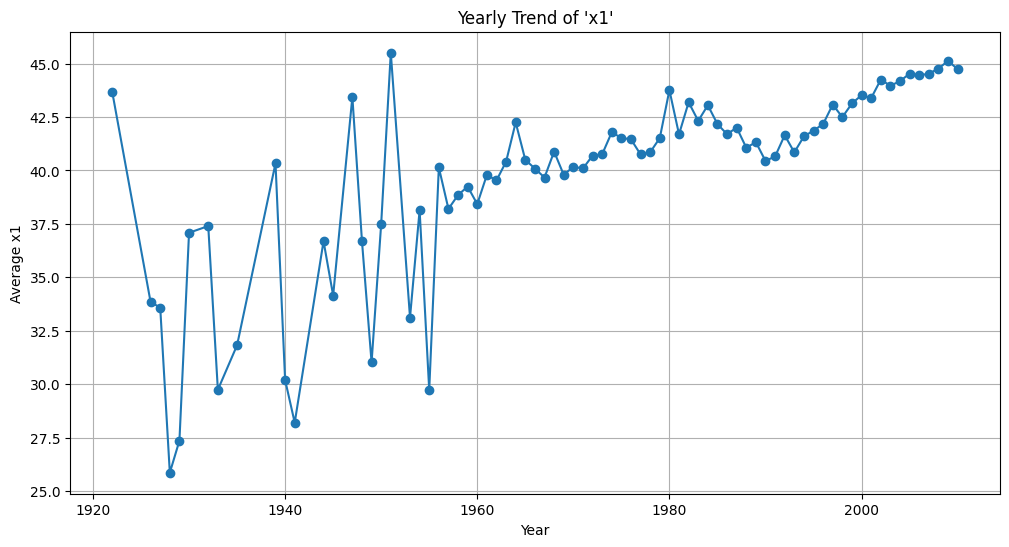

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'Dataset\Reduced_DatasetDell.csv'
data = pd.read_csv(file_path)

# -----------------------------
# 1. BASIC INFORMATION
# -----------------------------
print("----- BASIC INFO -----")
print(data.info())
print("\n----- SUMMARY STATISTICS -----")
print(data.describe())

# -----------------------------
# 2. MISSING VALUES ANALYSIS
# -----------------------------
print("\n----- MISSING VALUES -----")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Plot missing values (if any)
if missing_values.any():
    plt.figure(figsize=(10, 6))
    missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
    plt.title("Missing Values by Column")
    plt.ylabel("Count")
    plt.show()

# -----------------------------
# 3. CORRELATION ANALYSIS
# -----------------------------
correlation_matrix = data.corr()

# Heatmap of correlations for all variables
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (All Features)")
plt.show()

# Focused heatmap for highly correlated features
plt.figure(figsize=(10, 8))
strong_corr = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
sns.heatmap(strong_corr, cmap="coolwarm", annot=True)
plt.title("Highly Correlated Features (Threshold: 0.8)")
plt.show()

# -----------------------------
# 4. DISTRIBUTION ANALYSIS
# -----------------------------
sample_columns = ['x1', 'x2', 'x3', 'x4', 'x5']

# Histogram for selected variables
plt.figure(figsize=(12, 8))
data[sample_columns].hist(bins=30, figsize=(12, 8), edgecolor='black', layout=(2, 3))
plt.suptitle("Feature Distributions")
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[sample_columns])
plt.title("Boxplots for Selected Features")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 5. RELATIONSHIP ANALYSIS
# -----------------------------
# Pair plot
sns.pairplot(data[sample_columns], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Selected Features")
plt.show()

# Scatter plot with regression line (for two features)
plt.figure(figsize=(8, 6))
sns.regplot(x='x1', y='x2', data=data, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Scatter Plot with Regression Line (x1 vs x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# -----------------------------
# 6. OUTLIER ANALYSIS
# -----------------------------
# Z-score-based outlier detection for a sample column
from scipy.stats import zscore

z_scores = zscore(data['x1'])
outliers = data[(z_scores > 3) | (z_scores < -3)]
print("\n----- OUTLIERS IN 'x1' -----")
print(outliers)

# -----------------------------
# 7. TIME-SERIES TREND (IF APPLICABLE)
# -----------------------------
if 'Year' in data.columns:
    plt.figure(figsize=(12, 6))
    data.groupby('Year')['x1'].mean().plot(marker='o')
    plt.title("Yearly Trend of 'x1'")
    plt.ylabel("Average x1")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'regressor': Lasso(alpha=0.1), 'regressor__alpha': 0.1}

Model Evaluation:
Mean Squared Error (MSE): 87.5146880012459
R-squared (R2): 0.22622919696100852


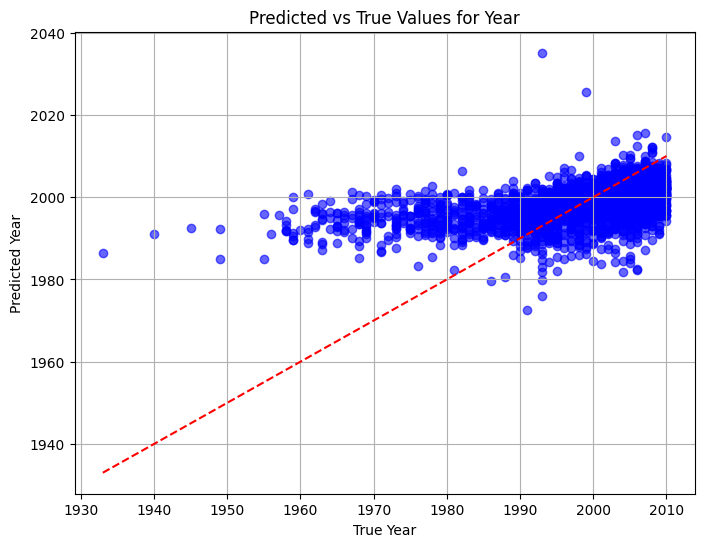


Kesimpulan Akhir:
Parameter Terbaik: {'regressor': Lasso(alpha=0.1), 'regressor__alpha': 0.1}
Mean Squared Error (MSE) pada data uji: 87.5146880012459
R-squared (R2) pada data uji: 0.22622919696100852


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# -----------------------------------
# 1. Load Dataset dan Pisahkan X (Fitur) dan y (Target)
# -----------------------------------
file_path = 'Dataset\Reduced_DatasetDell.csv'
data = pd.read_csv(file_path)

# Target adalah kolom 'Year', fitur adalah kolom lainnya
X = data.drop(columns=['Year'])  # Semua kolom kecuali 'Year'
y = data['Year']                 # Target adalah kolom 'Year'

# Split dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------
# 2. Membuat Pipeline
# -----------------------------------
# Pipeline mencakup preprocessing dan model
pipeline = Pipeline([
    ('scaler', StandardScaler()),                  # Standarisasi fitur
    ('poly_features', PolynomialFeatures(degree=1)),  # Fitur polinomial derajat 1
    ('regressor', LinearRegression())             # Default: Linear Regression
])

# -----------------------------------
# 3. Hyperparameter Tuning dengan GridSearchCV
# -----------------------------------
# Hanya menyertakan parameter relevan untuk tiap model
param_grid = [
    {
        'regressor': [LinearRegression()]  # LinearRegression tidak memerlukan hyperparameter tambahan
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1, 10]   # Parameter regularisasi untuk Ridge
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1, 10]   # Parameter regularisasi untuk Lasso
    }
]

@ignore_warnings(category=ConvergenceWarning)
def run_pipeline_with_fixed_poly():
    # Menjalankan GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # -----------------------------------
    # 4. Evaluasi Model
    # -----------------------------------
    # Model terbaik
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)

    # Evaluasi pada data uji
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

    # -----------------------------------
    # 5. Visualisasi Hasil
    # -----------------------------------
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title("Predicted vs True Values for Year")
    plt.xlabel("True Year")
    plt.ylabel("Predicted Year")
    plt.grid(True)
    plt.show()

    return grid_search.best_params_, mse, r2

# Menjalankan pipeline
best_params, test_mse, test_r2 = run_pipeline_with_fixed_poly()

# -----------------------------------
# Output Kesimpulan
# -----------------------------------
print("\nKesimpulan Akhir:")
print(f"Parameter Terbaik: {best_params}")
print(f"Mean Squared Error (MSE) pada data uji: {test_mse}")
print(f"R-squared (R2) pada data uji: {test_r2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}

Model Evaluation:
Mean Squared Error (MSE): 100.65055559122649
R-squared (R2): 0.1100869693435319


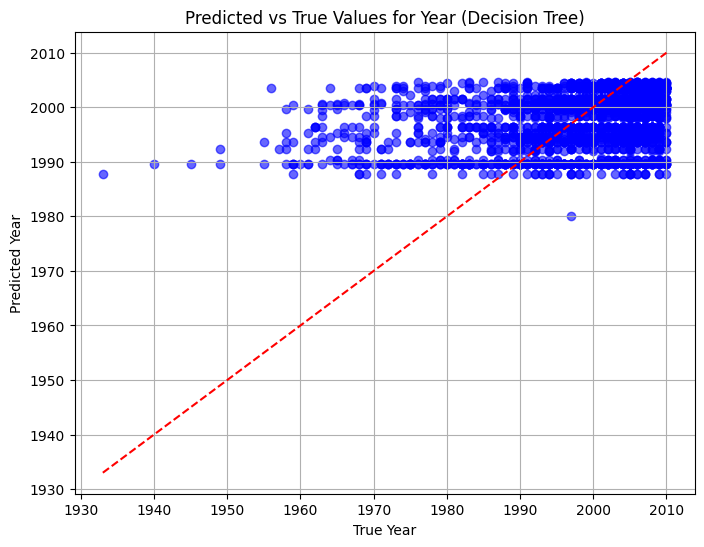


Kesimpulan Akhir:
Parameter Terbaik: {'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}
Mean Squared Error (MSE) pada data uji: 100.65055559122649
R-squared (R2) pada data uji: 0.1100869693435319


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------------
# 1. Load Dataset dan Pisahkan X (Fitur) dan y (Target)
# -----------------------------------
# Membaca dataset
file_path = 'Dataset\Reduced_DatasetDell.csv'
data = pd.read_csv(file_path)

# Target adalah kolom 'Year', fitur adalah kolom lainnya
X = data.drop(columns=['Year'])  # Semua kolom kecuali 'Year'
y = data['Year']                 # Target adalah kolom 'Year'

# Split dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------
# 2. Membuat Pipeline untuk Preprocessing dan Modeling
# -----------------------------------
# Pipeline hanya menggunakan DecisionTreeRegressor sebagai model
pipeline = Pipeline([
    ('regressor', DecisionTreeRegressor(random_state=42))  # Model Decision Tree Regressor
])

# -----------------------------------
# 3. Hyperparameter Tuning dengan GridSearchCV
# -----------------------------------
# Parameter yang akan di-tuning:
param_grid = {
    'regressor__max_depth': [3, 5, 10, None],     # Maksimal kedalaman pohon
    'regressor__min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split
    'regressor__min_samples_leaf': [1, 2, 4],    # Jumlah minimum sampel di setiap daun
    'regressor__max_features': [None, 'sqrt', 'log2']  # Fitur maksimum yang dipertimbangkan untuk split
}

# Menjalankan GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# -----------------------------------
# 4. Evaluasi Model
# -----------------------------------
# Model terbaik dari hasil GridSearchCV
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Prediksi pada data uji
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# -----------------------------------
# 5. Visualisasi Hasil
# -----------------------------------
# Scatter plot: Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs True Values for Year (Decision Tree)")
plt.xlabel("True Year")
plt.ylabel("Predicted Year")
plt.grid(True)
plt.show()

# -----------------------------------
# Output Kesimpulan
# -----------------------------------
print("\nKesimpulan Akhir:")
print(f"Parameter Terbaik: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE) pada data uji: {mse}")
print(f"R-squared (R2) pada data uji: {r2}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'regressor__n_neighbors': 11, 'regressor__p': 2, 'regressor__weights': 'distance'}

Model Evaluation:
Mean Squared Error (MSE): 94.16035234722301
R-squared (R2): 0.16747081987988244


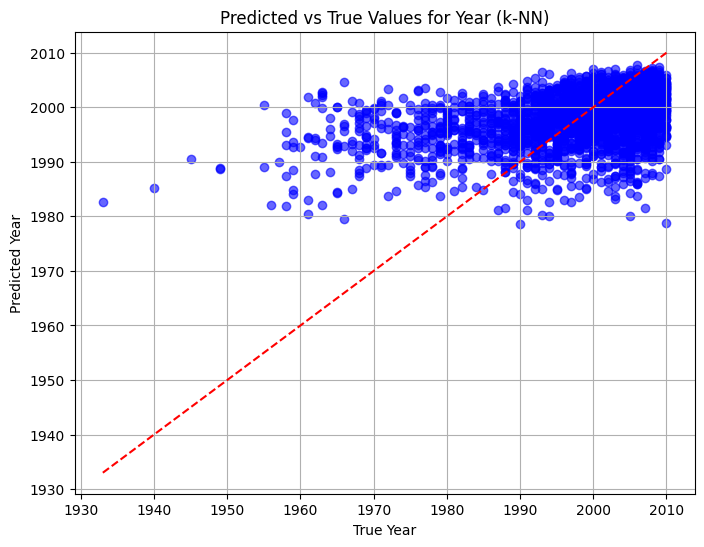


Kesimpulan Akhir:
Parameter Terbaik: {'regressor__n_neighbors': 11, 'regressor__p': 2, 'regressor__weights': 'distance'}
Mean Squared Error (MSE) pada data uji: 94.16035234722301
R-squared (R2) pada data uji: 0.16747081987988244


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------------
# 1. Load Dataset dan Pisahkan X (Fitur) dan y (Target)
# -----------------------------------
# Membaca dataset
file_path = 'Dataset\Reduced_DatasetDell.csv'
data = pd.read_csv(file_path)

# Target adalah kolom 'Year', fitur adalah kolom lainnya
X = data.drop(columns=['Year'])  # Semua kolom kecuali 'Year'
y = data['Year']                 # Target adalah kolom 'Year'

# Split dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------
# 2. Membuat Pipeline untuk Preprocessing dan Modeling
# -----------------------------------
# Pipeline untuk preprocessing dan KNN Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Standarisasi fitur
    ('regressor', KNeighborsRegressor())         # Model k-NN Regressor
])

# -----------------------------------
# 3. Hyperparameter Tuning dengan GridSearchCV
# -----------------------------------
# Parameter yang akan di-tuning:
param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11],   # Jumlah tetangga (k)
    'regressor__weights': ['uniform', 'distance'],  # Bobot tetangga
    'regressor__p': [1, 2]                        # Parameter jarak: 1 untuk Manhattan, 2 untuk Euclidean
}

# Menjalankan GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# -----------------------------------
# 4. Evaluasi Model
# -----------------------------------
# Model terbaik dari hasil GridSearchCV
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Prediksi pada data uji
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# -----------------------------------
# 5. Visualisasi Hasil
# -----------------------------------
# Scatter plot: Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs True Values for Year (k-NN)")
plt.xlabel("True Year")
plt.ylabel("Predicted Year")
plt.grid(True)
plt.show()

# -----------------------------------
# Output Kesimpulan
# -----------------------------------
print("\nKesimpulan Akhir:")
print(f"Parameter Terbaik: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE) pada data uji: {mse}")
print(f"R-squared (R2) pada data uji: {r2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__subsample': 1.0}

Model Evaluation:
Mean Squared Error (MSE): 80.99902894719442
R-squared (R2): 0.28383811786020563


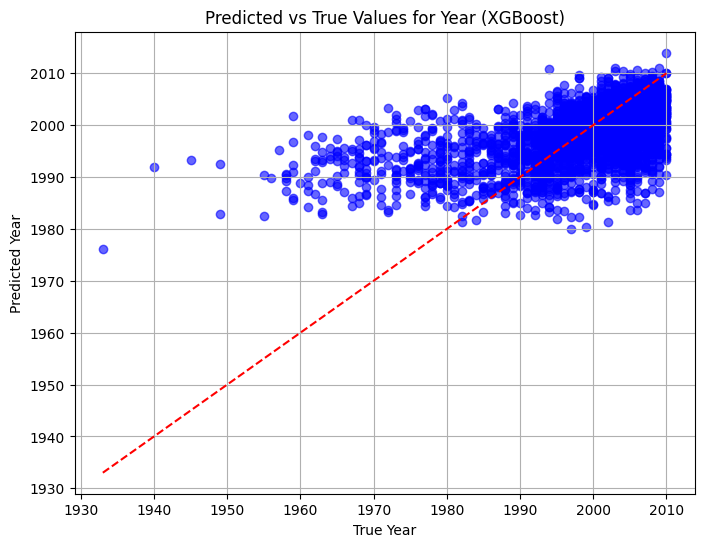


Kesimpulan Akhir:
Parameter Terbaik: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__subsample': 1.0}
Mean Squared Error (MSE) pada data uji: 80.99902894719442
R-squared (R2) pada data uji: 0.28383811786020563


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# -----------------------------------
# 1. Load Dataset dan Pisahkan X (Fitur) dan y (Target)
# -----------------------------------
# Membaca dataset
file_path = 'Dataset\Reduced_DatasetDell.csv'
data = pd.read_csv(file_path)

# Target adalah kolom 'Year', fitur adalah kolom lainnya
X = data.drop(columns=['Year'])  # Semua kolom kecuali 'Year'
y = data['Year']                 # Target adalah kolom 'Year'

# Split dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------
# 2. Membuat Pipeline untuk Preprocessing dan Modeling
# -----------------------------------
# Pipeline untuk XGBoost Regressor (langsung tanpa preprocessing standar karena XGBoost relatif kuat terhadap skala fitur)
pipeline = Pipeline([
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))  # Model XGBoost Regressor
])

# -----------------------------------
# 3. Hyperparameter Tuning dengan GridSearchCV
# -----------------------------------
# Parameter yang akan di-tuning:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],       # Jumlah pohon yang akan dibuat
    'regressor__learning_rate': [0.01, 0.1, 0.2],     # Kecepatan pembelajaran
    'regressor__max_depth': [3, 5, 7],                 # Kedalaman maksimal setiap pohon
    'regressor__subsample': [0.8, 1.0],                # Proporsi sampel yang digunakan untuk pelatihan
    'regressor__colsample_bytree': [0.8, 1.0]          # Proporsi fitur yang digunakan untuk setiap pohon
}

# Menjalankan GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# -----------------------------------
# 4. Evaluasi Model
# -----------------------------------
# Model terbaik dari hasil GridSearchCV
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Prediksi pada data uji
y_pred = best_model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# -----------------------------------
# 5. Visualisasi Hasil
# -----------------------------------
# Scatter plot: Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs True Values for Year (XGBoost)")
plt.xlabel("True Year")
plt.ylabel("Predicted Year")
plt.grid(True)
plt.show()

# -----------------------------------
# Output Kesimpulan
# -----------------------------------
print("\nKesimpulan Akhir:")
print(f"Parameter Terbaik: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE) pada data uji: {mse}")
print(f"R-squared (R2) pada data uji: {r2}")